In [1]:
#Importing libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_APPL = pd.read_csv('data/stock_dfs/AAPL.csv')
df_AMZN = pd.read_csv('data/stock_dfs/AMZN.csv')
df_GOOG = pd.read_csv('data/stock_dfs/GOOG.csv')
df_MSFT = pd.read_csv('data/stock_dfs/MSFT.csv')
df_TSLA = pd.read_csv('data/stock_dfs/TSLA.csv')
df_SP500 = pd.read_csv('data/stock_dfs/^GSPC.csv')

In [3]:
df = pd.DataFrame.from_dict({
    'Date': df_APPL['Date'], 
    'APPL': df_APPL['Close'], 
    'AMZN': df_AMZN['Close'], 
    'GOOG': df_GOOG['Close'], 
    'MSFT': df_MSFT['Close'], 
    'TSLA': df_TSLA['Close'],
    'S&P 500': df_SP500['Close']
}).set_index('Date')

In [4]:
df.describe()

,APPL,AMZN,GOOG,MSFT,TSLA,S&P 500
count,3524.000000,3524.000000,3524.000000,3524.000000,3150.000000,3524.000000
mean,48.026177,55.012187,46.269045,94.599203,58.807496,2297.550930
std,47.153213,53.972438,36.214139,87.339764,95.526397,1024.352503
min,2.792857,2.422000,7.042354,15.150000,1.053333,676.530029
25%,16.178571,11.379875,15.818272,29.760000,8.957666,1384.404999
50%,28.262501,29.610750,35.317251,51.330000,16.222334,2088.239990
75%,53.905626,90.886126,59.853124,135.314999,24.448000,2888.390076
max,182.009995,186.570496,150.709000,343.109985,409.970001,4796.560059


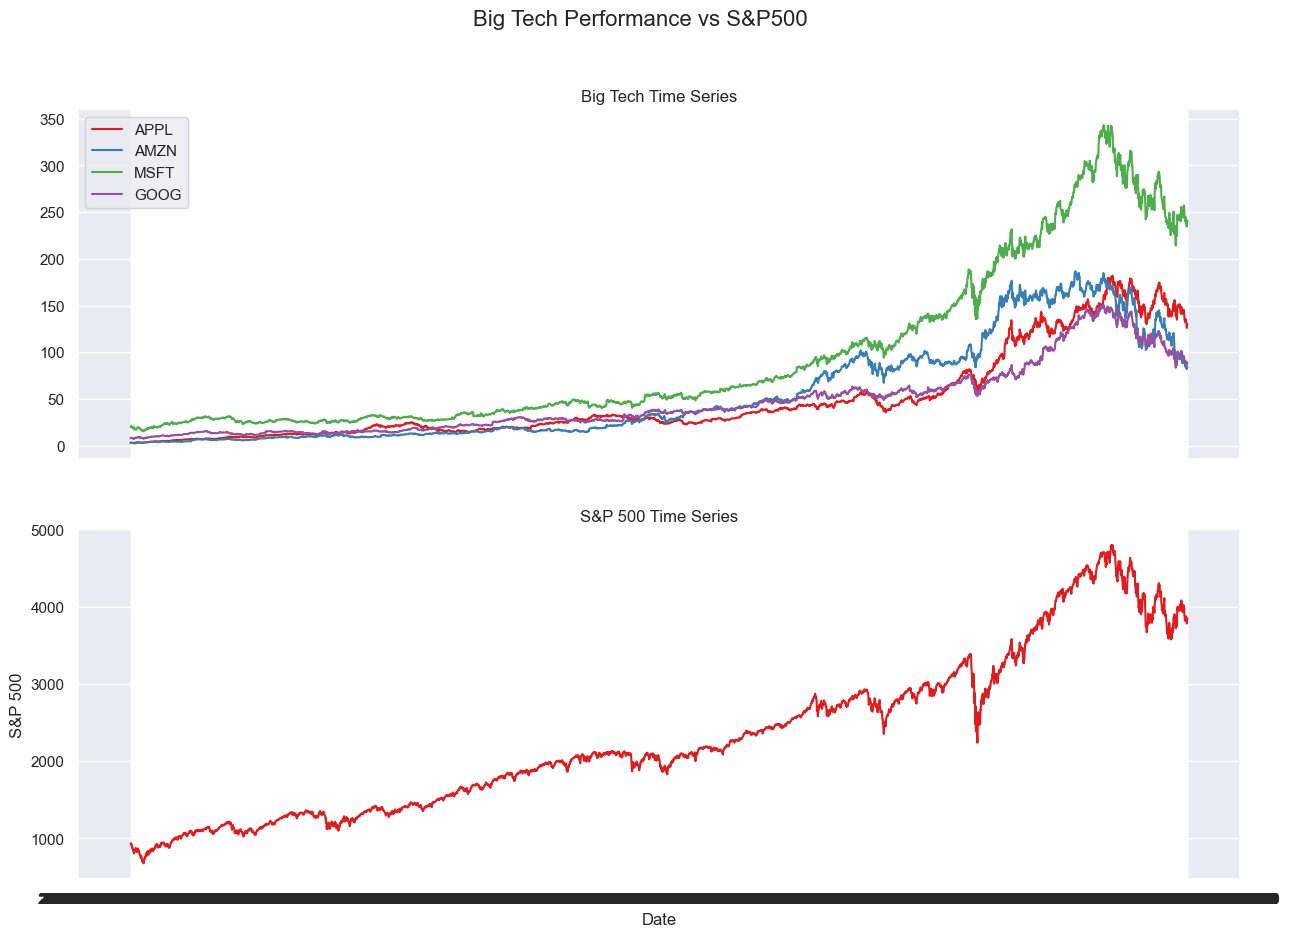

In [5]:
sns.set_palette('Set1')
sns.set_context('notebook')
sns.set_style('darkgrid')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

sns.lineplot(data=df[['APPL','AMZN','MSFT','GOOG']], dashes=False, ax=ax1)
ax1.set_title('Big Tech Time Series')

sns.lineplot(data=df['S&P 500'], ax=ax2)
ax2.set_title('S&P 500 Time Series')
fig.suptitle('Big Tech Performance vs S&P500', fontsize=16)

plt.show()

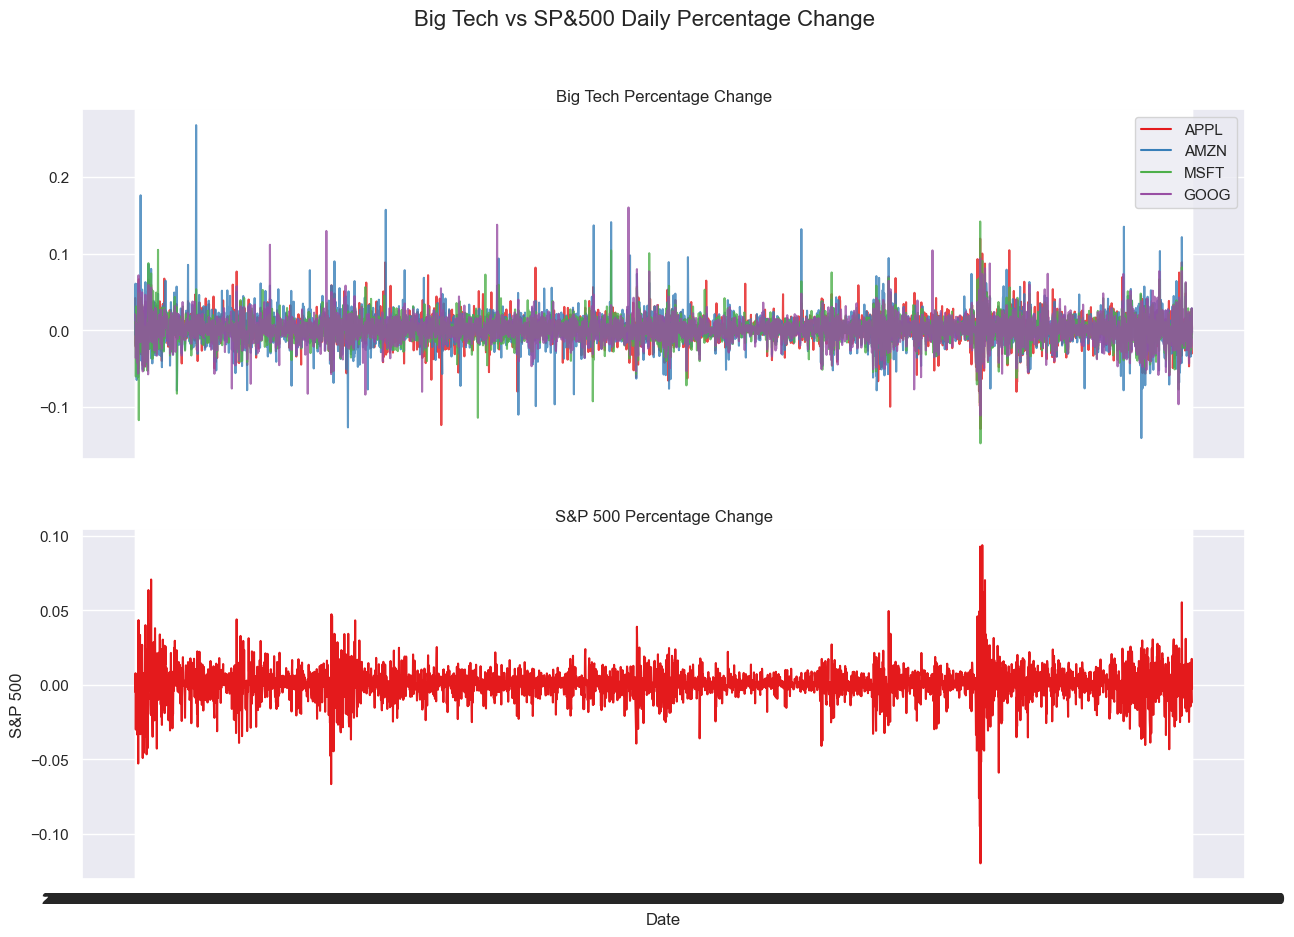

In [6]:
#Calculating Percentage Changes

returns = df[['APPL','AMZN','MSFT','GOOG']].pct_change()

sp_returns = df['S&P 500'].pct_change()

#Creating Lineplots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

sns.lineplot(data=returns, ax=ax1, dashes=False, alpha=0.8)
ax1.set_title('Big Tech Percentage Change')
sns.lineplot(data=sp_returns, ax=ax2)
ax2.set_title('S&P 500 Percentage Change')

fig.suptitle('Big Tech vs SP&500 Daily Percentage Change', fontsize=16)

plt.show()

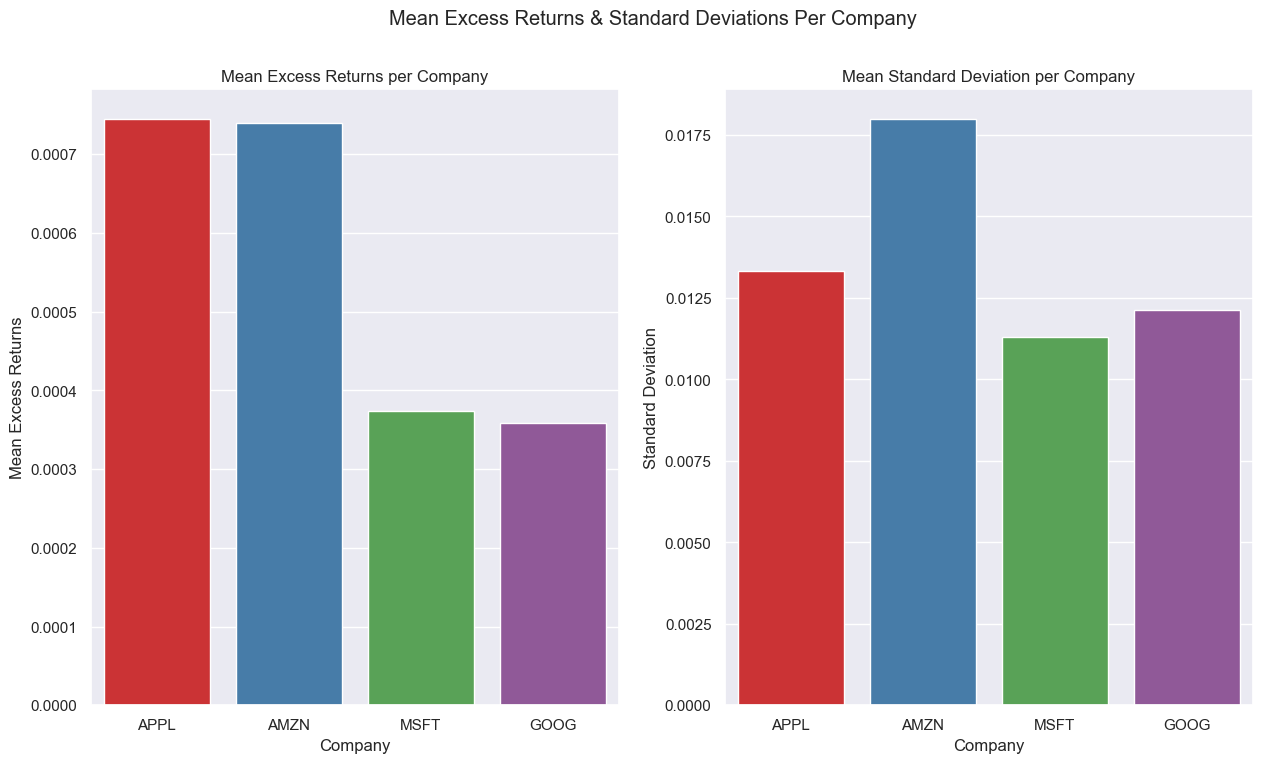

In [7]:
def dfing(data=None, feature=None):
    df = pd.DataFrame(data)
    df = df.reset_index()
    df = df.rename(columns={'index':'Company', 0:f'{feature}'})
    return df

excess_returns = returns.sub(sp_returns, axis=0)
mean_excess_returns = excess_returns.mean()
mean_excess_returns_df = dfing(data=mean_excess_returns, feature='Mean Excess Returns')

# Calculating the Standard deviations

sd_excess_returns = excess_returns.std()
sd_excess_returns_df = dfing(data=sd_excess_returns, feature='Standard Deviation')

# Plotting Mean Excess Returns and Standard Deviations

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

sns.barplot(data=mean_excess_returns_df, x='Company', y='Mean Excess Returns', ax=ax1)
ax1.set_title('Mean Excess Returns per Company')

sns.barplot(data=sd_excess_returns_df, x='Company', y='Standard Deviation',  ax=ax2)
ax2.set_title('Mean Standard Deviation per Company')

fig.suptitle('Mean Excess Returns & Standard Deviations Per Company')
plt.show()

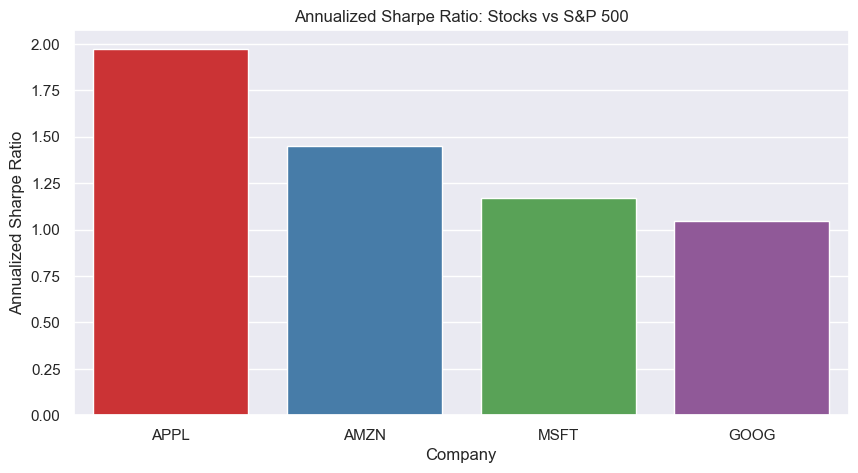

In [8]:
# Calculating the daily sharpe ratio
daily_sharpe_ratio = mean_excess_returns.div(sd_excess_returns)

# Annualizing the sharpe ratio
annual_factor = np.sqrt(1248)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

annual_sharpe_ratio_df = dfing(annual_sharpe_ratio, feature='Annualized Sharpe Ratio')

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(data=annual_sharpe_ratio_df, x='Company', y='Annualized Sharpe Ratio', ax=ax1)
ax1.set_title('Annualized Sharpe Ratio: Stocks vs S&P 500')

plt.show()